In [1]:
#import mxnet as mx
#from mxnet import nd, autograd #nd is an array library similar to numpy, autograd will be used for gradients
#from mxnet import gluon #gluon is the high-level api that will save us many keystrokes
import numpy as np #our good friend numpy that you should be familiar with by now
import requests
import os
import shutil #package we will use to move files
import tarfile
import io
import skimage
from skimage import io as imageIO #module used to load images need to change the name to avoid conflicts
import matplotlib.pyplot as plt
from glob import glob #a handy tool for getting files in folders
import random
%matplotlib inline
import sys
from PIL import Image
#mx.random.seed(1) #set the random seed so that answers can be repeatably random

url = 'http://vis-www.cs.umass.edu/lfw/lfw-a.tgz'
base = os.getcwd()
tmp = 'faces' #specify a location to store the images we will work with
loc = os.path.join(base, tmp)
print(loc)

/Users/kyamz/Desktop/For Github/faces


In [2]:
if not os.path.isdir(loc): #make a directory to store the images in
    os.mkdir(loc)
r = requests.get(url)
if r.status_code == 200: #if the GET request is successful
    hold = io.BytesIO(r.content)
    f = tarfile.open(fileobj=hold) #load the tarfile into a tarfile object for extraction
    f.extractall(loc)
    people = os.listdir(os.path.join(loc, 'lfw'))

if people:
    print("We now have {} folders with images of different people's faces".format(len(people)))

We now have 433 folders with images of different people's faces


In [3]:
image_root = 'tmp'
image_root = os.path.join(loc, image_root)
print(image_root)

if not os.path.isdir(image_root):
    os.mkdir(image_root) #create the new root folder
    
#now loop over all of the images and copy them to the appropriate folder
counter=0
for folder in people:
    counter+=1
    path = os.path.join(loc, 'lfw', folder)
    images = glob(os.path.join(path, '*.jpg'))
    for current_image in images:
        rand=random.random()
        dest = image_root
        shutil.copy2(current_image, dest)

#Print out some results to verify that everything worked as expected
print('The number of images')
print counter

/Users/kyamz/Desktop/For Github/faces/tmp
The number of images
433


number of images is 1054
('The image dimensions are ', (250, 250, 3))


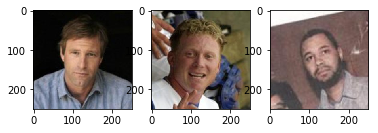

In [4]:
paths = glob(os.path.join(image_root,'*'))
num_images=len(paths)
print 'number of images is '+str(num_images)
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
example = imageIO.imread(paths[0])
print("The image dimensions are ", example.shape)
ax1.imshow(example)
ax2.imshow(imageIO.imread(paths[1]))
ax3.imshow(imageIO.imread(paths[2]))

## Get some data

In [20]:
#loop x times and concatenate three random images
for x in range(num_images):
    num0=(random.randint(0,num_images))-1
    num1=(random.randint(0,num_images))-1
    num2=(random.randint(0,num_images))-1
    #print num0
    #print num1
    #print num2
    #f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    #ax1.imshow(imageIO.imread(paths[num0]))
    #ax2.imshow(imageIO.imread(paths[num1]))
    #ax3.imshow(imageIO.imread(paths[num2]))
    
    images = map(Image.open, [paths[num0], paths[num1], paths[num2]])
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]

    new_im.save('/Users/kyamz/Desktop/For Github/faces/concatenated/'+'test'+str(x)+'.jpg')
    
    if x>99:
        break